In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import os
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
train_dir = '/home/jayraj/Desktop/No_mouse_mouse/data_Set/dummy_reg/train/'
train_label_file = '/home/jayraj/Desktop/No_mouse_mouse/data_Set/dummy_reg/coordi_train.csv'
train_coordi_dict ={}
with open(train_label_file) as f:
    lines = f.read().splitlines()
for line in lines:
    elements=line.split(',')
    train_coordi_dict[elements[0]]=elements[1:]
    
test_dir = '/home/jayraj/Desktop/No_mouse_mouse/data_Set/dummy_reg/test/'
test_label_file = '/home/jayraj/Desktop/No_mouse_mouse/data_Set/dummy_reg/coordi_test.csv'
test_coordi_dict ={}
with open(test_label_file) as f:
    lines = f.read().splitlines()
for line in lines:
    elements=line.split(',')
    test_coordi_dict[elements[0]]=elements[1:]

train_sample = len(os.listdir(train_dir))
test_sample = len(os.listdir(test_dir))
print("Train Set samples: "+str(train_sample))
print("Test Set samples: "+str(test_sample))

Train Set samples: 82
Test Set samples: 4


In [3]:
train_x_data_set = np.zeros([train_sample,100,100,3])
train_y_data_set = np.zeros([train_sample,4])

In [4]:
for index,filename in enumerate(os.listdir(train_dir)):
    img = Image.open(train_dir+filename)
    img = img.resize((100,100),Image.ANTIALIAS)
    im = np.array(img)
    train_x_data_set[index,:,:,:]=im
    train_y_data_set[index,:]=train_coordi_dict[filename]

In [5]:
train_x_data_set = train_x_data_set/255

In [6]:
model = Sequential()
model.add(Conv2D(8,(3,3),input_shape=(100,100,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Conv2D(12,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Conv2D(16,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=4,activation='sigmoid'))

In [7]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [8]:
model.fit(train_x_data_set,train_y_data_set,epochs=100)

Epoch 1/100
82/82 [==============================] - 1s 13ms/step - loss: 0.0848
Epoch 2/100
82/82 [==============================] - 1s 10ms/step - loss: 0.0402
Epoch 3/100
82/82 [==============================] - 1s 11ms/step - loss: 0.0227
Epoch 4/100
82/82 [==============================] - 1s 11ms/step - loss: 0.0292
Epoch 5/100
82/82 [==============================] - 1s 9ms/step - loss: 0.0270
Epoch 6/100
82/82 [==============================] - 1s 9ms/step - loss: 0.0227
Epoch 7/100
82/82 [==============================] - 1s 8ms/step - loss: 0.0214
Epoch 8/100
82/82 [==============================] - 1s 10ms/step - loss: 0.0206
Epoch 9/100
82/82 [==============================] - 1s 9ms/step - loss: 0.0188
Epoch 10/100
82/82 [==============================] - 1s 8ms/step - loss: 0.0176
Epoch 11/100
82/82 [==============================] - 1s 8ms/step - loss: 0.0165
Epoch 12/100
82/82 [==============================] - 1s 8ms/step - loss: 0.0147
Epoch 13/100
82/82 [============

In [9]:
test_x_data_set = np.zeros([test_sample,100,100,3])
test_y_data_set = np.zeros([test_sample,4])
for index,filename in enumerate(os.listdir(test_dir)):
    img = Image.open(test_dir+filename)
    img = img.resize((100,100),Image.ANTIALIAS)
    im = np.array(img)
    test_x_data_set[index,:,:,:]=im
    test_y_data_set[index,:]=test_coordi_dict[filename]
test_x_data_set = test_x_data_set/255

In [10]:
model.evaluate(test_x_data_set,test_y_data_set)

4/4 [==============================] - 0s 15ms/step


0.0021237265318632126

In [11]:
predictions=model.predict(test_x_data_set)
predictions

array([[ 0.26060244,  0.16675363,  0.63148618,  0.8815428 ],
       [ 0.17472386,  0.19365296,  0.59735262,  0.83719033],
       [ 0.4558585 ,  0.02533373,  0.88085353,  0.61043668],
       [ 0.24158834,  0.28230092,  0.80314678,  0.88043857]], dtype=float32)

In [12]:
test_x_data_set[0].shape

(100, 100, 3)

[ 0.4558585   0.02533373  0.88085353  0.61043668]


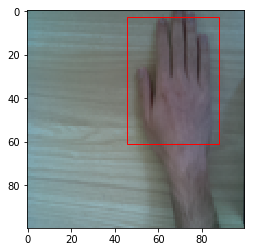

In [13]:
print(predictions[2])
hight = predictions[2][2]-predictions[2][0]
width = predictions[2][3]-predictions[2][1]
test_img = Image.fromarray(np.uint8(test_x_data_set[2]*255))
fig,ax = plt.subplots(1)
ax.imshow(test_img)
rect = patches.Rectangle((predictions[2][0]*100,predictions[2][1]*100),hight*100,width*100,linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
plt.show()

In [ ]:
model.save('/home/jayraj/Desktop/No_mouse_mouse/model/hand_re')